In [2]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.stats import f,t,chi2,norm
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)
#plt.rc('text', usetex=True)
#Para montar drive en colab
#from google.colab import drive
#from google.colab import files
#drive.mount('drive')
#import io
#import warnings
#warnings.filterwarnings('ignore')
#uploaded = files.upload()

In [13]:
#Ejercicio 2
x=np.array([[2,12],[8,9],[6,9],[8,10]])
mu = np.array([np.average(x[:,0][:]),np.average(x[:,1][:])])
mu_0=np.array([7,11])
n = np.shape(x)[0]
Sigma = np.cov(x.T)*(n-1)/n
s=0
for i in range(n):
  s+=np.array(np.array([x[i]])-mu).T@np.array(np.array([x[i]])-mu)
s=s/n
s_0=0
for i in range(n):
  s_0+=np.array(np.array([x[i]])-mu_0).T@np.array(np.array([x[i]])-mu_0)
s_0=s_0/n
Lambda=pow(np.linalg.det(s)/np.linalg.det(s_0),n/2)
print(Lambda,pow(Lambda,(2/n)))

0.03251814028486967 0.18032786885245905


In [7]:
s_0

array([[ 7. , -1.5],
       [-1.5,  2.5]])

In [3]:
#Ejercicio 3
Sigma=np.array([[3266.46,1343.97,731.54,1175.50,162.68,238.37],
                [1343.97,721.91,324.25,537.35,80.17,117.73],
                [731.54,324.25,179.28,281.17,39.15,56.80],
                [1175.50,537.35,281.17,474.98,63.73,94.85],
                [162.68,80.17,39.15,63.73,9.95,13.88],
                [238.37,117.73,56.80,94.85,13.88,21.26]])
x_mean = np.array([95.52,164.38,55.69,93.39,17.98,31.13])
Sigma_inv = np.linalg.inv(Sigma)
eigvalues, eigvectors = LA.eig(Sigma)


In [4]:
np.shape(Sigma)

(6, 6)

In [6]:
n = 61
p = len(x_mean)
alpha = 0.05
F = f.ppf(q=1-alpha, dfn=p, dfd=n-p)
critical = (((n-1)*p)/(n-p))*F
semi1 = np.sqrt(Sigma[0,0])*np.sqrt(critical/n)
semi2 = np.sqrt(Sigma[3,3])*np.sqrt(critical/n)
mu1 = np.linspace(x_mean[0]-semi1,x_mean[0]+semi1,1000)
mu2 = np.linspace(x_mean[3]-2*semi2,x_mean[3]+2*semi2,1000)

mu1,mu2 = np.meshgrid(mu1,mu2)
theta = np.arctan(eigvectors[:,0][1]/eigvectors[:,0][0])
#Inciso a)
print("Intervalos de confianza simultaneos:")
for i in range(p):
  print("x_"+str(i+1)+":","[",round(x_mean[i]-np.sqrt(Sigma[i,i])*np.sqrt(critical/n),3),",",round(x_mean[i]+np.sqrt(Sigma[i,i])*np.sqrt(critical/n),3),"]")

Intervalos de confianza simultaneos:
x_1: [ 67.321 , 123.719 ]
x_2: [ 151.123 , 177.637 ]
x_3: [ 49.084 , 62.296 ]
x_4: [ 82.637 , 104.143 ]
x_5: [ 16.424 , 19.536 ]
x_6: [ 28.855 , 33.405 ]


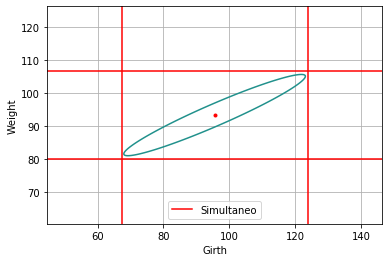

In [8]:
#Inciso b)

cols = np.array([True, False, False,True, False, False])
rows = np.array([True, False, False,True, False, False])
S_aux=Sigma[cols][:,rows]
eig=LA.eig(S_aux)[0]

semi1 = np.sqrt(eig[0])*np.sqrt(critical/n)
semi2 = np.sqrt(eig[1])*np.sqrt(critical/n)
contorno = ((x_mean[0]-mu1)*np.cos(theta) + (x_mean[3]-mu2)*np.sin(theta))**2/semi1**2 + ((x_mean[0]-mu1)*np.sin(theta) - (x_mean[3]-mu2)*np.cos(theta))**2/semi2**2 -1


plt.contour(mu1,mu2,contorno,0)
plt.plot(x_mean[0], x_mean[3], marker='o', markersize=3, color="red")
plt.axis('equal')
plt.grid()

aux1 = np.sqrt(Sigma[0,0])*np.sqrt(critical/n)
aux2 = np.sqrt(Sigma[1,1])*np.sqrt(critical/n)
plt.axhline(y=x_mean[3]-aux2,color='red',label="Simultaneo")
plt.axhline(y=x_mean[3]+aux2,color='red')
plt.axvline(x=x_mean[0]-aux1,color='red')
plt.axvline(x=x_mean[0]+aux1,color='red')

plt.xlim(x_mean[0]-semi1-3,x_mean[0]+semi1+3)
plt.ylim(x_mean[3]-semi1-3,x_mean[3]+semi1+3)  
plt.ylabel("Weight")
plt.xlabel("Girth")
plt.legend(loc="best",fontsize='medium')
plt.savefig("3.2.png")
plt.show()

In [9]:
Sigma

array([[3266.46, 1343.97,  731.54, 1175.5 ,  162.68,  238.37],
       [1343.97,  721.91,  324.25,  537.35,   80.17,  117.73],
       [ 731.54,  324.25,  179.28,  281.17,   39.15,   56.8 ],
       [1175.5 ,  537.35,  281.17,  474.98,   63.73,   94.85],
       [ 162.68,   80.17,   39.15,   63.73,    9.95,   13.88],
       [ 238.37,  117.73,   56.8 ,   94.85,   13.88,   21.26]])

In [10]:
n = 61
p = len(x_mean)
alpha = 0.05
T = t.ppf(q=1-(alpha)/(2*p), df=n-1)
#Inciso a)
print("Intervalos de confianza Bonferroni:")
for i in range(p):
  print("x_"+str(i+1)+":","[",round(x_mean[i]-np.sqrt(Sigma[i,i]/n)*T,3),",",round(x_mean[i]+np.sqrt(Sigma[i,i]/n)*T,3),"]")

Intervalos de confianza Bonferroni:
x_1: [ 75.553 , 115.487 ]
x_2: [ 154.993 , 173.767 ]
x_3: [ 51.012 , 60.368 ]
x_4: [ 85.776 , 101.004 ]
x_5: [ 16.878 , 19.082 ]
x_6: [ 29.519 , 32.741 ]


29.485570953848075 32.77442904615192
16.855019357668585 19.104980642331416


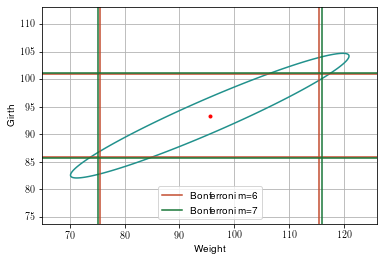

In [190]:
#Inciso d)
contorno = ((x_mean[0]-mu1)*np.cos(theta) + (x_mean[3]-mu2)*np.sin(theta))**2/semi1**2 + ((x_mean[0]-mu1)*np.sin(theta) - (x_mean[3]-mu2)*np.cos(theta))**2/semi2**2 -1

plt.contour(mu1,mu2,contorno,0)
plt.plot(x_mean[0], x_mean[3], marker='o', markersize=3, color="red")
plt.axis('equal')
plt.grid()

m=6
T = -t.ppf(q=1-(alpha)/(2*m), df=n-1)
plt.axhline(y=x_mean[3]+np.sqrt(Sigma[3,3]/n)*T,color='#c24a2d',label="Bonferroni m=6")
plt.axhline(y=x_mean[3]-np.sqrt(Sigma[3,3]/n)*T,color='#c24a2d')
plt.axvline(x=x_mean[0]+np.sqrt(Sigma[0,0]/n)*T,color='#c24a2d')
plt.axvline(x=x_mean[0]-np.sqrt(Sigma[0,0]/n)*T,color='#c24a2d')

#Inciso e)

m=7
T = t.ppf(q=(1-alpha/(2*m)), df=n-1)
plt.axhline(y=x_mean[3]+np.sqrt(Sigma[3,3]/n)*T,color='#167536',label="Bonferroni m=7")
plt.axhline(y=x_mean[3]-np.sqrt(Sigma[3,3]/n)*T,color='#167536')
plt.axvline(x=x_mean[0]+np.sqrt(Sigma[0,0]/n)*T,color='#167536')
plt.axvline(x=x_mean[0]-np.sqrt(Sigma[0,0]/n)*T,color='#167536')

print(x_mean[5]-np.sqrt(Sigma[5,5]/n)*T,x_mean[5]+np.sqrt(Sigma[5,5]/n)*T)
print(x_mean[4]-np.sqrt(Sigma[4,4]/n)*T,x_mean[4]+np.sqrt(Sigma[4,4]/n)*T)

plt.xlabel("Weight")
plt.ylabel("Girth")
plt.legend(loc="best",fontsize='medium')
plt.savefig("3_e.png")
plt.show()

In [241]:
  #Inciso f)
n = 61
p = len(x_mean)
alpha = 0.05
ji = chi2.ppf(q=1-alpha,df=p)


for i in range(p):
  print("x_"+str(i+1)+":","[",round(x_mean[i]-np.sqrt(Sigma[i,i])*np.sqrt(ji/n),3),",",round(x_mean[i]+np.sqrt(Sigma[i,i])*np.sqrt(ji/n),3),"]")


x_1: [ 69.553 , 121.487 ]
x_2: [ 152.173 , 176.587 ]
x_3: [ 49.607 , 61.773 ]
x_4: [ 83.488 , 103.292 ]
x_5: [ 16.547 , 19.413 ]
x_6: [ 29.035 , 33.225 ]


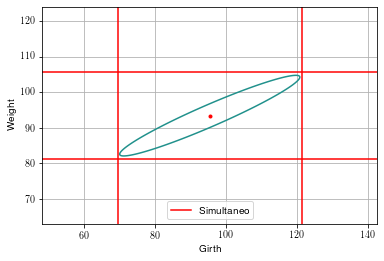

In [161]:
#Inciso f.b)

semi1 = np.sqrt(Sigma[0,0])*np.sqrt(ji/n)
semi2 = np.sqrt(Sigma[3,3])*np.sqrt(ji/n)
mu1 = np.linspace(x_mean[0]-semi1,x_mean[0]+semi1,1000)
mu2 = np.linspace(x_mean[3]-2*semi2,x_mean[3]+2*semi2,1000)

mu1,mu2 = np.meshgrid(mu1,mu2)
theta = np.arctan(eigvectors[:,0][1]/eigvectors[:,0][0])


semi1 = np.sqrt(eig[0])*np.sqrt(ji/n)
semi2 = np.sqrt(eig[1])*np.sqrt(ji/n)
contorno = ((x_mean[0]-mu1)*np.cos(theta) + (x_mean[3]-mu2)*np.sin(theta))**2/semi1**2 + ((x_mean[0]-mu1)*np.sin(theta) - (x_mean[3]-mu2)*np.cos(theta))**2/semi2**2 -1


plt.contour(mu1,mu2,contorno,0)
plt.plot(x_mean[0], x_mean[3], marker='o', markersize=3, color="red")
plt.axis('equal')
plt.grid()

aux1 = np.sqrt(Sigma[0,0])*np.sqrt(ji/n)
aux2 = np.sqrt(Sigma[1,1])*np.sqrt(ji/n)
plt.axhline(y=x_mean[3]-aux2,color='red',label="Simultaneo")
plt.axhline(y=x_mean[3]+aux2,color='red')
plt.axvline(x=x_mean[0]-aux1,color='red')
plt.axvline(x=x_mean[0]+aux1,color='red')

plt.xlim(x_mean[0]-semi1-3,x_mean[0]+semi1+3)
plt.ylim(x_mean[3]-semi1-3,x_mean[3]+semi1+3)  
plt.ylabel("Weight")
plt.xlabel("Girth")
plt.legend(loc="best",fontsize='medium')
plt.savefig("3_f1.png")
plt.show()

Intervalos de confianza simultaneos:
x_1: [ 76.214 , 114.826 ]
x_2: [ 155.304 , 173.456 ]
x_3: [ 51.167 , 60.213 ]
x_4: [ 86.028 , 100.752 ]
x_5: [ 16.914 , 19.046 ]
x_6: [ 29.572 , 32.688 ]


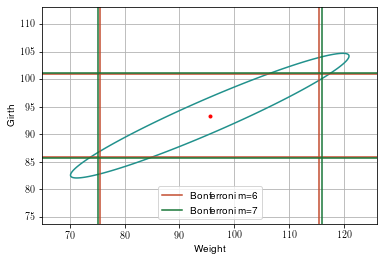

In [162]:
#Inciso f.d)
n = 61
p = len(x_mean)
alpha = 0.05
T = norm.ppf(q=1-(alpha)/(2*p))
#Inciso e)
print("Intervalos de confianza simultaneos:")
for i in range(p):
  print("x_"+str(i+1)+":","[",round(x_mean[i]-np.sqrt(Sigma[i,i]/n)*T,3),",",round(x_mean[i]+np.sqrt(Sigma[i,i]/n)*T,3),"]")

contorno = ((x_mean[0]-mu1)*np.cos(theta) + (x_mean[3]-mu2)*np.sin(theta))**2/semi1**2 + ((x_mean[0]-mu1)*np.sin(theta) - (x_mean[3]-mu2)*np.cos(theta))**2/semi2**2 -1

plt.contour(mu1,mu2,contorno,0)
plt.plot(x_mean[0], x_mean[3], marker='o', markersize=3, color="red")
plt.axis('equal')
plt.grid()

m=6
T = -t.ppf(q=1-(alpha)/(2*m), df=n-1)
plt.axhline(y=x_mean[3]+np.sqrt(Sigma[3,3]/n)*T,color='#c24a2d',label="Bonferroni m=6")
plt.axhline(y=x_mean[3]-np.sqrt(Sigma[3,3]/n)*T,color='#c24a2d')
plt.axvline(x=x_mean[0]+np.sqrt(Sigma[0,0]/n)*T,color='#c24a2d')
plt.axvline(x=x_mean[0]-np.sqrt(Sigma[0,0]/n)*T,color='#c24a2d')

#Inciso e)

m=7
T = -t.ppf(q=(1-alpha/(2*m)), df=n-1)
plt.axhline(y=x_mean[3]+np.sqrt(Sigma[3,3]/n)*T,color='#167536',label="Bonferroni m=7")
plt.axhline(y=x_mean[3]-np.sqrt(Sigma[3,3]/n)*T,color='#167536')
plt.axvline(x=x_mean[0]+np.sqrt(Sigma[0,0]/n)*T,color='#167536')
plt.axvline(x=x_mean[0]-np.sqrt(Sigma[0,0]/n)*T,color='#167536')


plt.xlabel("Weight")
plt.ylabel("Girth")
plt.legend(loc="best",fontsize='medium')
plt.savefig("3_fe.png")
plt.show()

In [58]:
#Ejercicio 4
import pandas as pd
from datetime import datetime

df = pd.read_csv(io.StringIO(uploaded['crypto_data.csv'].decode('utf-8')))
df.head()

,id,time,bitcoin,ethereum,ripple,bitcoin_cash,tether,litecoin,eos,binance_coin,bitcoin_sv,stellar
0,25611,2020-02-06 00:00:05,9617.821045,204.129695,0.277542,442.341285,1.002153,72.532381,4.519347,19.229057,299.427525,0.068763
1,25612,2020-02-06 00:05:02,9622.748756,204.495108,0.277304,444.987897,1.001578,72.575367,4.524913,19.255650,302.021011,0.068806
2,25613,2020-02-06 00:10:03,9625.514188,204.514310,0.276689,444.458587,1.003492,72.359213,4.524040,19.246752,301.535034,0.068709
3,25614,2020-02-06 00:15:02,9611.570081,203.225257,0.274488,440.127172,1.005246,71.848529,4.486529,19.194388,299.469787,0.068280
4,25615,2020-02-06 00:20:02,9586.715700,202.745851,0.274458,438.460532,1.003008,71.608254,4.478681,19.139503,299.109861,0.068094


In [174]:
#Función para cambiarle la fecha
def formato_fecha(df):
  df["FECHA"]=[datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S') for x in (df.time)]
  # df["AÑO"]=df["FECHA"].dt.year-2000
  # df["MES"]=df["FECHA"].dt.month
  # df["DIA"]=df["FECHA"].dt.weekday
  # df["HORA"]=df["FECHA"].dt.hour
  # df["MINUTOS"]=df["FECHA"].dt.minute
  # df["SEGUNDOS"]=df["FECHA"].dt.second
  df["Fecha"]=df["FECHA"].dt.date
  df["Hour"]=df["FECHA"].dt.time

formato_fecha(df)
df.head()

,id,time,bitcoin,ethereum,ripple,bitcoin_cash,tether,litecoin,eos,binance_coin,bitcoin_sv,stellar,FECHA,Fecha,Hour
0,25611,2020-02-06 00:00:05,9617.821045,204.129695,0.277542,442.341285,1.002153,72.532381,4.519347,19.229057,299.427525,0.068763,2020-02-06 00:00:05,2020-02-06,00:00:05
1,25612,2020-02-06 00:05:02,9622.748756,204.495108,0.277304,444.987897,1.001578,72.575367,4.524913,19.255650,302.021011,0.068806,2020-02-06 00:05:02,2020-02-06,00:05:02
2,25613,2020-02-06 00:10:03,9625.514188,204.514310,0.276689,444.458587,1.003492,72.359213,4.524040,19.246752,301.535034,0.068709,2020-02-06 00:10:03,2020-02-06,00:10:03
3,25614,2020-02-06 00:15:02,9611.570081,203.225257,0.274488,440.127172,1.005246,71.848529,4.486529,19.194388,299.469787,0.068280,2020-02-06 00:15:02,2020-02-06,00:15:02
4,25615,2020-02-06 00:20:02,9586.715700,202.745851,0.274458,438.460532,1.003008,71.608254,4.478681,19.139503,299.109861,0.068094,2020-02-06 00:20:02,2020-02-06,00:20:02


In [288]:
X=df.loc[(df["Fecha"]==df["Fecha"][0])][["bitcoin",	"ethereum",	"ripple",	"bitcoin_cash",	"tether",	"litecoin",	"eos",	"binance_coin",	"bitcoin_sv",	"stellar"]]
Y=df.loc[(df["Fecha"]!=df["Fecha"][0])][["bitcoin",	"ethereum",	"ripple",	"bitcoin_cash",	"tether",	"litecoin",	"eos",	"binance_coin",	"bitcoin_sv",	"stellar"]]

# Mean and Covarinza matrix
Xb = np.mean(X,0)
S = np.cov(np.transpose(X))
invS = np.linalg.inv(S)

### Calcular estadístico
n = np.shape(X)[0]
p = np.shape(Y)[1]

#Limite de control
alpha = 0.05
F = f.ppf(q=1.-alpha, dfn=p, dfd=n-p)
LC = 1.0*(n-1)*p/(n-p)*F 
print ("Limite de control: ", LC)
Y=Y.to_numpy()
# Estadístico T2 para cada día i
futuras = np.shape(Y)[0]
T2 = 0
T2vec = []
step = []
i = 0
while(T2 <= LC and  i<= futuras):
  #print(Y[i,:])
  T2 = (1.0*n)/(n+1)*np.matmul(np.matmul((Y[i,:] - Xb), invS),np.transpose(Y[i,:]-Xb))
  T2vec.append(T2)
  step.append(i+1)
  i += 1

Limite de control:  19.2522286202812


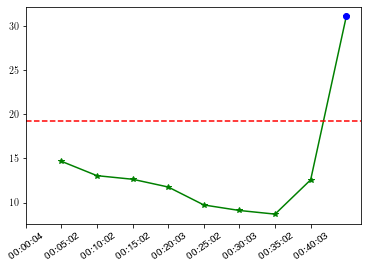

In [289]:
import matplotlib.pyplot as plt
plt.plot(step[0:(i)],T2vec[0:(i)],'-*g')
plt.axhline(y=LC, color='r', linestyle='--')

if (i <= dias ):
    plt.plot(i,T2,'ob')

aux=df.loc[(df["Fecha"]!=df["Fecha"][0])]["Hour"].to_numpy()
plt.xticks(np.arange(i), aux[0:i])
plt.xticks(rotation=35)
plt.savefig("4_a.png")

In [0]:
X=df.loc[(df["Fecha"]==df["Fecha"][0])][["bitcoin",	"ethereum",	"ripple",	"bitcoin_cash",	"tether",	"litecoin",	"eos",	"binance_coin",	"bitcoin_sv",	"stellar"]]
Y=df.loc[(df["Fecha"]!=df["Fecha"][0])][["bitcoin",	"ethereum",	"ripple",	"bitcoin_cash",	"tether",	"litecoin",	"eos",	"binance_coin",	"bitcoin_sv",	"stellar"]]
aux=df.loc[(df["Fecha"]!=df["Fecha"][0])]["FECHA"]
Y=Y.to_numpy()
X=X.to_numpy()

In [0]:
#Reshaping X y Y
X_aux=np.zeros((int(np.shape(X)[0]/12), np.shape(X)[1]))
for j in range(int(np.shape(X)[0]/12)):
  for i in range(np.shape(X)[1]):
    X_aux[j,i]=X[j:j+11,i].mean()
  j=j+11


Y_aux=np.zeros((int(np.shape(Y)[0]/12), np.shape(Y)[1]))
for j in range(int(np.shape(Y)[0]/12)):
  for i in range(np.shape(Y)[1]):
    Y_aux[j,i]=Y[j:j+11,i].mean()
  j=j+11



In [309]:
Y=Y_aux
# X=X_aux
# Mean and Covarinza matrix
Xb = np.mean(X,0)
#S = (n-1)/(n*m)*np.cov(np.transpose(X))
S = np.cov(np.transpose(X))
invS = np.linalg.inv(S)

### Calcular estadístico
n = np.shape(X)[0]
p = np.shape(Y)[1]

#Limite de control
alpha = 0.05
F = f.ppf(q=1-alpha, dfn=p, dfd=n*m-n-p+1)
LC = 1.0*(n-1)*(m-1)*p/(n*m-n-p+1)*F 
print ("Limite de control: ", LC)
#Y=Y.to_numpy()

# Estadístico T2 para cada día i
futuras = np.shape(Y)[0]
T2 = 0
T2vec = []
step = []
i = 0
while(T2 <= LC and  i<= futuras):
  #print(Y[i,:])
  T2 = (1.0*n)/(n+1)*np.matmul(np.matmul((Y[i,:] - Xb), invS),np.transpose(Y[i,:]-Xb))
  T2vec.append(T2)
  step.append(i+1)
  i += 1

Limite de control:  18.39402161624606


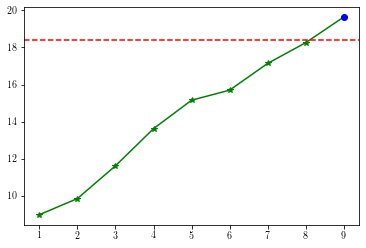

In [311]:
plt.plot(step[0:(i)],T2vec[0:(i)],'-*g')
plt.axhline(y=LC, color='r', linestyle='--')

if (i <= dias ):
    plt.plot(i,T2,'ob')

aux=df.loc[(df["Fecha"]!=df["Fecha"][0])]["Hour"].to_numpy()
plt.savefig("4_b.png")

In [209]:
label

array([datetime.date(2020, 2, 7), datetime.date(2020, 2, 7),
       datetime.date(2020, 2, 7), ..., datetime.date(2020, 2, 11),
       datetime.date(2020, 2, 11), datetime.date(2020, 2, 11)],
      dtype=object)